# **Case study 2 - facial recognition**
Our 2nd  case study will be to predict the labels for image data with a popular dataset called
the Labeled Faces in the Wild dataset from the scikit-learn library. The dataset is called
the Olivetti Face dataset and it comprises pictures of famous people's faces, with
appropriate labels. Our task is that of facial recognition, a supervised machine learning
model that is able to predict the name of the person given an image of their face

Step-1: Load  the olivetti face dataset.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# the olivetti face dataset
from sklearn.datasets import fetch_lfw_people
# feature extraction modules
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# feature scaling module
from sklearn.preprocessing import StandardScaler
# standard python modules
from time import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# this ensures that your plotting will show directly in your jupyter notebook
# scikit-learn model selection modules
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
# machine learning modules
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)



# Let's inspect the image arrays to find shapes for plotting the images. We can do
#this with the following code:

n_samples, h, w = lfw_people.images.shape
n_samples, h, w

(1288, 50, 37)

**Now, let's set up the X and y for our machine learning pipeline. We will grab
the data attribute of the lfw_people object:**


In [ ]:
# for machine learning we use the data directly (as relative pixel positions info is ignored by this model)
X = lfw_people.data
y = lfw_people.target
n_features = X.shape[1]

# ***Some data exploration***
We have 1,288 rows by 1,850 columns. To do some brief exploratory analysis, we can plot one of the images by using this code:

'Hugo Chavez'

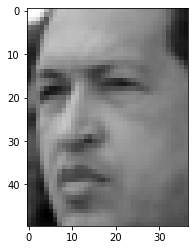

In [ ]:
# plot one of the faces
plt.imshow(X[0].reshape((h, w)), cmap=plt.cm.gray)
lfw_people.target_names[y[0]]


**Here, you can see that the image is slightly different, with darker pixels around the face.
Now, let's set up the label to predict:**

'Hugo Chavez'

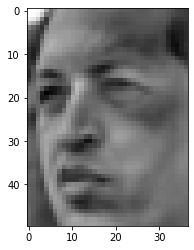

In [ ]:
plt.imshow(StandardScaler().fit_transform(X)[0].reshape((h, w)),
cmap=plt.cm.gray)
lfw_people.target_names[y[0]]


In [ ]:
# the label to predict is the id of the person
target_names = lfw_people.target_names
n_classes = target_names.shape[0]


# ***Applied facial recognition***
Now, we can move on to the machine learning pipelines that will be used to create our
facial recognition models:
1. We can start by creating train, test, and split in our dataset, as shown in the
following code block:

In [ ]:
# let's split our dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.25, random_state=1)


2. We are ready to perform a Principal Component Analysis (PCA) on our dataset.
We will want to instantiate a PCA first and ensure that we scale our data before
applying PCA in our pipeline. This can be done as follows:

In [ ]:
# instantiate the PCA module
pca = PCA(n_components=200, whiten=True)
# create a pipeline called preprocessing that will scale data and then apply PCA
preprocessing = Pipeline([('scale', StandardScaler()), ('pca',pca)])

3. Now, we can fit our pipeline:


In [ ]:
print("Extracting the top %d eigenfaces from %d faces" % (200,
X_train.shape[0]))
# fit the pipeline to the training set
preprocessing.fit(X_train)
# grab the PCA from the pipeline
extracted_pca = preprocessing.steps[1][1]


Extracting the top 200 eigenfaces from 966 faces


5. Let's look at the scree plot:

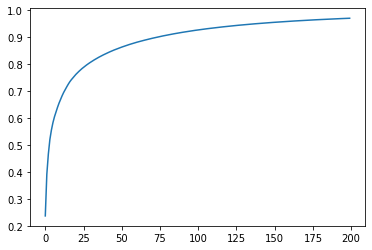

In [ ]:
# Scree Plot
plt.plot(np.cumsum(extracted_pca.explained_variance_ratio_))

We can see that starting at 100 components captures over 90% of the variance, compared to
the 1,850 original features.

6. We can create a function to plot our PCA components, like so:


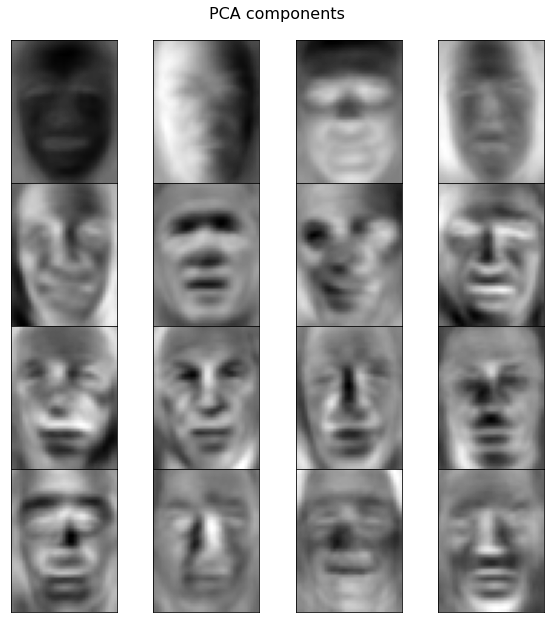

In [ ]:
comp = extracted_pca.components_
image_shape = (h, w)
def plot_gallery(title, images, n_col, n_row):
 plt.figure(figsize=(2. * n_col, 2.26 * n_row))
 plt.suptitle(title, size=16)
 for i, comp in enumerate(images):
  plt.subplot(n_row, n_col, i + 1)
  vmax = max(comp.max(), -comp.min())
  plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
  vmin=-vmax, vmax=vmax)
  plt.xticks(())
  plt.yticks(())
 plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
 plt.show()
plot_gallery('PCA components', comp[:16], 4,4)


Let's create a function named plot_confusion matr

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
 normalize=False,
title='Confusion matrix',
cmap=plt.cm.Blues):
 plt.imshow(cm, interpolation='nearest', cmap=cmap)
 plt.title(title)
 plt.colorbar()
 tick_marks = np.arange(len(classes))
 plt.xticks(tick_marks, classes, rotation=45)
 plt.yticks(tick_marks, classes)
 thresh = cm.max() / 2.
 for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, cm[i, j],
  horizontalalignment="center",
  color="white" if cm[i, j] > thresh else "black")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

0.8198757763975155 Accuracy score for best estimator
                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.79      0.77        19
     Colin Powell       0.85      0.71      0.77        55
  Donald Rumsfeld       0.61      0.80      0.69        25
    George W Bush       0.91      0.88      0.89       142
Gerhard Schroeder       0.69      0.87      0.77        31
      Hugo Chavez       0.82      0.88      0.85        16
       Tony Blair       0.83      0.71      0.76        34

         accuracy                           0.82       322
        macro avg       0.78      0.80      0.79       322
     weighted avg       0.83      0.82      0.82       322

None
37.1 seconds to grid search and predict the test set


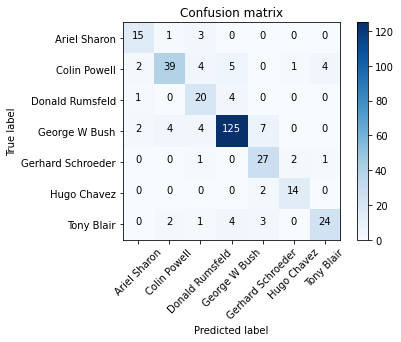

In [ ]:
# fit without using PCA to see what the difference will be
t0 = time()
param_grid = {'C': [1e-2, 1e-1,1e0,1e1, 1e2]}

logreg = LogisticRegression()
clf = GridSearchCV(logreg,param_grid)
clf = clf.fit(X_train, y_train)
best_clf = clf.best_estimator_
# Predicting people's names on the test set
y_pred = best_clf.predict(X_test)
print( accuracy_score(y_pred, y_test), "Accuracy score for best estimator")
print(classification_report(y_test, y_pred, target_names=target_names))
print( plot_confusion_matrix(confusion_matrix(y_test, y_pred,
labels=range(n_classes)), target_names))
print (round((time() - t0), 1), "seconds to grid search and predict the test set")

Using only raw pixels, our linear model was able to achieve 81.9% accuracy. This time, let's
apply PCA to see what the difference will be. We will hardcode the number of components
to extract to 200 for now:

0.8105590062111802 Accuracy score for best estimator
                   precision    recall  f1-score   support

     Ariel Sharon       0.79      0.79      0.79        19
     Colin Powell       0.78      0.78      0.78        55
  Donald Rumsfeld       0.65      0.80      0.71        25
    George W Bush       0.92      0.84      0.88       142
Gerhard Schroeder       0.77      0.87      0.82        31
      Hugo Chavez       0.65      0.81      0.72        16
       Tony Blair       0.75      0.71      0.73        34

         accuracy                           0.81       322
        macro avg       0.76      0.80      0.78       322
     weighted avg       0.82      0.81      0.81       322

None
12.1 seconds to grid search and predict the test set


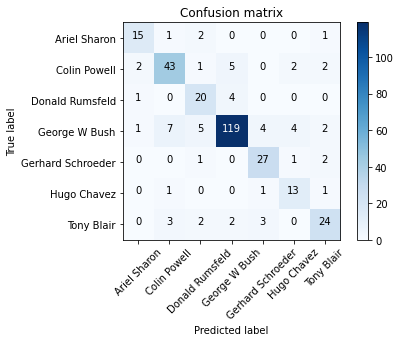

In [ ]:
t0 = time()
face_pipeline = Pipeline(steps=[('PCA', PCA(n_components=200)),
('logistic', logreg)])
pipe_param_grid = {'logistic__C': [1e-2, 1e-1,1e0,1e1, 1e2]}
clf = GridSearchCV(face_pipeline, pipe_param_grid)
clf = clf.fit(X_train, y_train)
best_clf = clf.best_estimator_
# Predicting people's names on the test set
y_pred = best_clf.predict(X_test)
print( accuracy_score(y_pred, y_test), "Accuracy score for best estimator")
print((classification_report(y_test, y_pred, target_names=target_names)))
print (plot_confusion_matrix(confusion_matrix(y_test, y_pred,
labels=range(n_classes)), target_names))
print (round((time() - t0), 1), "seconds to grid search and predict the test set")

Interesting! We can see that our accuracy went down to 80.4% and our time to predict went
up by applying PCA. We should not get discouraged, however; this likely means that we
have not found the optimal number of components to use yet.
Let's plot a few of the predicted names versus the true names within our test set to see some
of the errors/correct labels that our models are producing:


Let's now implement a grid search to find the best model and accuracy for our data

In [ ]:
def get_best_model_and_accuracy(model, params, X, y):
 grid = GridSearchCV(model, # the model to grid search
 params, # the parameter set to try
 error_score=0.) # if a parameter set raises an error, continue and set the performance as a big, fat 0
 grid.fit(X, y) # fit the model and parameters
 # our classical metric for performance
 print( "Best Accuracy: {}".format(grid.best_score_))
 # the best parameters that caused the best accuracy
 print ("Best Parameters: {}".format(grid.best_params_))
 # the average time it took a model to fit to the data (in seconds)
 print ("Average Time to Fit (s):{}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
 # the average time it took a model to predict out of sample data (in seconds)
 # this metric gives us insight into how this model will perform in real-time analysis
 print( "Average Time to Score (s):{}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))



Now, we can create a larger grid search pipeline that includes many more components,
namely:
A scaling module
A PCA module to extract the best features that capture the variance in the data
A Linear Discriminat Analysis (LDA) module to create features that best
separate the faces from one another
Our linear classifier, which will reap the benefits of our three feature engineering
modules and attempt to distinguish between our faces


In [ ]:
# Create a larger pipeline to gridsearch
face_params = {'logistic__C':[1e-2, 1e-1, 1e0, 1e1, 1e2],
 'preprocessing__pca__n_components':[100, 150, 200, 250,
300],
 'preprocessing__pca__whiten':[True, False],
 'preprocessing__lda__n_components':range(1, 7)
 # [1, 2, 3, 4, 5, 6] recall the max allowed is n_classes-1
 }
pca = PCA()
lda = LinearDiscriminantAnalysis()
preprocessing = Pipeline([('scale', StandardScaler()), ('pca', pca),
('lda', lda)])
logreg = LogisticRegression()
face_pipeline = Pipeline(steps=[('preprocessing', preprocessing),
('logistic', logreg)])
get_best_model_and_accuracy(face_pipeline, face_params, X, y)


Best Accuracy: 0.852480921786867
Best Parameters: {'logistic__C': 0.1, 'preprocessing__lda__n_components': 6, 'preprocessing__pca__n_components': 150, 'preprocessing__pca__whiten': True}
Average Time to Fit (s):0.514
Average Time to Score (s):0.011
